**Regresión polinomial.**

*Uso de la validación cruzada (método del gradiente).*

Hello, I'm Go1234550

Realizaremos una regresión lineal múltiple para predecir el precio de una casa haciendo uso de las siguientes variables:

* sqft_living(pies cuadrados de área habitable): Indica el área total, en pies cuadrados, de la superficie habitable de una vivienda.

* bedrooms: Numero de cuartos que cuenta la vivienda.

Se consideran estas variables ya que son las que tienen mayor influencia para la determinación del precio de una propiedad.

Dataset utilizado: https://www.kaggle.com/code/laeclover/predicci-n-de-venta-de-casa/notebook

**Importamos las librerías.**

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random

full_data_file = pd.read_csv('kc_house_data.csv', header=0, encoding='latin-1')
full_data_file

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122257.00,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47721.0000,-122319.00,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122233.00,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122393.00,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122045.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3121500340,20140712T000000,690000.0,4,2.50,2900,23488,2.0,0,0,...,9,2900,0,1992,0,98053,47.6726,-122.03,2900,34589
695,7697870860,20140625T000000,245000.0,3,2.00,1410,5760,1.0,0,0,...,7,1410,0,1985,0,98030,47.3702,-122185.00,1670,6222
696,7527200030,20141229T000000,700000.0,5,2.50,2830,25958,1.0,0,1,...,8,1610,1220,1979,0,98075,47.5896,-122083.00,2670,21567
697,2013200390,20140922T000000,268000.0,4,1.75,1680,9966,1.0,0,0,...,7,1100,580,1977,0,98198,47.3923,-122311.00,2400,10369


**Creamos la regresión múltiple.**

Definimos la clase de nuestra regresión múltiple junto a sus métodos.

In [131]:
class MultipleRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))

        # Initialize the random coefficients
        self.coef_ = np.random.randn(x_with_intercept.shape[1])

        # Gradient descent
        for _ in range(self.n_iter):
            gradient = -2 * x_with_intercept.T @ (y - (x_with_intercept @ self.coef_))
            self.coef_ -= self.learning_rate * gradient

        # The first coefficient is the intercept
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))
        
        return x_with_intercept @ np.concatenate(([self.intercept_], self.coef_))


**Realizamos el Train-Test Split**

Extraemos los datos que utilizaremos, considerando un 60% para el conjunto de entrenamiento y 40% para el de pruebas.

In [254]:
#sqft_living = column 5
x1 = pd.read_csv('kc_house_data.csv', usecols=[5], encoding='latin-1').values
#bedrooms = column 3
x2 = pd.read_csv('kc_house_data.csv', usecols=[3], encoding='latin-1').values
#price = column 2
y = pd.read_csv('kc_house_data.csv', usecols=[2], encoding='latin-1').values

# Determinate the size of the training set(60%) and the test set(40%)
train_size = int(0.6 * len(x1))

#Show the data in table with the columns
filtdata = pd.read_csv('kc_house_data.csv',  header=0, usecols=[2,3,5], encoding='latin-1')
filtdata

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680
...,...,...,...
694,690000.0,4,2900
695,245000.0,3,1410
696,700000.0,5,2830
697,268000.0,4,1680


**Implementación de la validación cruzada.**

Realizamos la validación cruzada, seleccionando aleatoriamente los datos para el conjunto de entrenamiento y el conjunto de prueba.

In [252]:
#Cross Validation
# Shuffle the data indices to apply cross-validation
idx = list(range(len(x1)))
random.shuffle(idx)

# Split the data into training and test sets
x1_train = x1[idx[:train_size]]
x2_train = x2[idx[:train_size]]
y_train = y[idx[:train_size]]

x1_test = x1[idx[train_size:]]
x2_test = x2[idx[train_size:]]
y_test = y[idx[train_size:]]

# Convert the data to numpy arrays in one column
x1_train = x1_train.flatten()
x2_train = x2_train.flatten()
y_train = y_train.flatten()

#Print the size of the training and test sets}
print("Training set size: ", len(x1_train))
print("Test set size: ", len(x1_test))

Training set size:  419
Test set size:  280


**Entrenamiento del modelo.**

Entrenamos el modelo con nuestro conjunto de entrenamiento.

In [251]:
# Create the model
model = MultipleRegression(learning_rate=0.001, n_iter=1000)

# Prepare the data
X = np.column_stack((x1_train, x2_train))
Y = y_train

# Train the model
model.fit(X, Y)

/tmp/ipykernel_5676/1274896291.py:17: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * x_with_intercept.T @ (y - (x_with_intercept @ self.coef_))
/tmp/ipykernel_5676/1274896291.py:18: RuntimeWarning: invalid value encountered in subtract
  self.coef_ -= self.learning_rate * gradient


Graficamos la regresión resultante de nuestro entrenamiento.

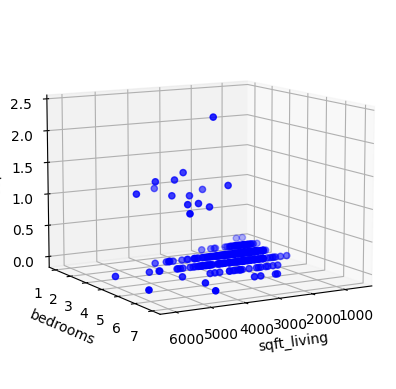

In [234]:
# Graph the data and the hiperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter the data
ax.scatter(x1_train, x2_train, y_train, c = 'b', marker = 'o')

# Surface of the hiperplane
xx1, xx2 = np.meshgrid(x1_train, x2_train)

# Equation of the hiperplane
yy = model.intercept_ + model.coef_[0] * xx1 + model.coef_[1] * xx2
ax.plot_surface(xx1, xx2, yy, color='r', alpha=0.2)

# Set the labels
ax.set_xlabel('sqft_living')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.azim = 60 #azim is the azimuth angle in the x,y plane
ax.elev = 10 #elev is the elevation angle in the z plane

Mostramos los coeficientes de la regresión.

In [236]:
#Coeficients of the regression (intercept and the coeficients of the variables)
print('Intercept:', model.intercept_)
print('Coeficients:', model.coef_)

Intercept: nan
Coeficients: [nan nan]


**Entrenamiento del modelo.**

Realizamos las predicciones de nuestro modelo.

In [237]:
predict = model.predict(np.column_stack((x1_test, x2_test)))
print('Predicciones:', predict)
print('\nValores reales:', y_test)

# Show the graph
ax.scatter(x1_test, x2_test, predict, c = 'g', marker = 'o')
plt.show()

Predicciones: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 